# UMAP (Uniform Manifold Approximation and Projection for Dimension Reduction) 

Umap was applied the 142 x 406380 DNA methylation matrix and the CpGs were projected in 10 UMAP components. Scatterplot of the 10 UMAPS visualized in pairs follows.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns

from sklearn.impute import SimpleImputer

import joblib

In [2]:
X = joblib.load('./AML_data/meth.pkl')
phenodf = joblib.load('./AML_data/pheno.pkl')


In [3]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X)
Xfinal = pd.DataFrame(imputer.transform(X), columns = X.columns, index = X.index)

In [4]:
Xfinal.shape

(142, 406830)

In [5]:
# Create a new column for genotypes to merge some groups together

# Nas, No result and other will form one group

mll = ['other 11q23/MLL', 't(9;11)', 't(10;11)','t(11;19)']
other = ['normal', 'mono 7', 'inv(16)', '3q21q26', 't(8;21)', 'sole+8', 't(15;17)']
finalgenotype = []

for data in phenodf.genotype:
    if data in mll:
        finalgenotype.append('MLL rearranged')   
    elif data == 'no result':
        finalgenotype.append('Undefined')   
    elif data == 'other clon abn':
        finalgenotype.append('Undefined')  
    elif data in other:
        finalgenotype.append(data)    
    else:
        finalgenotype.append('Undefined')
        
phenodf['finalgenotype'] = finalgenotype

In [6]:
phenodf.finalgenotype.unique()

array(['normal', 'MLL rearranged', 'Undefined', 'mono 7', 'inv(16)',
       '3q21q26', 't(8;21)', 'sole+8', 't(15;17)'], dtype=object)

In [7]:
phenodf.finalgenotype.value_counts()

Undefined         43
normal            30
MLL rearranged    25
t(8;21)           19
inv(16)           12
mono 7             5
t(15;17)           4
sole+8             3
3q21q26            1
Name: finalgenotype, dtype: int64

In [8]:
mll = ['other 11q23/MLL', 't(9;11)', 't(10;11)','t(11;19)']
other = ['normal', 'mono 7', 'inv(16)', '3q21q26', 't(8;21)', 'sole+8', 't(15;17)']
finalgenotype2 = []

for data in phenodf.genotype:
    if data == mll[0]:
        finalgenotype2.append(data)
    elif data  ==  mll[1]:
        finalgenotype2.append(data)
    
    elif data  ==  mll[2]:
        finalgenotype2.append(data) 
    elif data  ==  mll[3]:
        finalgenotype2.append(data)
        
    
    elif data == 'no result':
        finalgenotype2.append('Undefined')   
    elif data == 'other clon abn':
        finalgenotype2.append('Undefined')  
    elif data in other:
        finalgenotype2.append(data)    
    else:
        finalgenotype2.append('Undefined')
        
phenodf['finalgenotype2'] = finalgenotype2

In [9]:
phenodf

,sample.type,FAB,genotype,relapse,finalgenotype,finalgenotype2
public_id,,,,,,
AML_001,diagnostic,M2,normal,True,normal,normal
AML_002,diagnostic,M5,t(11;19),True,MLL rearranged,t(11;19)
AML_003,diagnostic,M1,normal,False,normal,normal
AML_004_r,relapse,M5,NaN,True,Undefined,Undefined
AML_005,diagnostic,M2,mono 7,True,mono 7,mono 7
...,...,...,...,...,...,...
AML_122,diagnostic,M2,normal,False,normal,normal
AML_033,diagnostic,M6,normal,True,normal,normal
AML_123,diagnostic,M4,inv(16),False,inv(16),inv(16)


In [10]:
import umap

In [11]:
mapper = umap.UMAP(n_components = 10,  random_state = 7)
mapper

UMAP(dens_frac=0.0, dens_lambda=0.0, n_components=10, random_state=7)

In [12]:
data = mapper.fit_transform(Xfinal)

In [13]:
n_components = 10

In [14]:
cols = ['UMAP_' +  str(c+1) for c in range(n_components)]


In [15]:
datadf = pd.DataFrame(data, columns = cols)

In [16]:
features = pd.DataFrame(data = phenodf[['FAB','finalgenotype', 'finalgenotype2', 'sample.type']], columns = ['FAB', 'finalgenotype', 'finalgenotype2', 'sample.type']).reset_index(drop = True)

In [17]:
finaldf = pd.concat([datadf, features], axis = 1)

In [18]:
finaldf.index =  Xfinal.index

In [19]:
finaldf.shape

(142, 14)

In [20]:
finaldf['finalgenotype3'] = finaldf.finalgenotype2

In [21]:
# Change name to undefined relapses
finaldf.loc[(finaldf['sample.type']=='relapse') & (finaldf['finalgenotype3']=='Undefined'), 'finalgenotype3'] = 'relapse'
#finaldf

# Colors

1. 3q21q6 - r
2. other 11q23/MLL - coral
3. t(9;11) - #FF8C00 dark orange
4. t(10;11) - #CC7722 ochre
5. t(11;19) -  #FFBD88 mac and cheese
6. Undefined -light gray
7. inversion 16 - jade (#00A86B)
8. mono 7 - Dark olive green (#556B2F)
9. normal - Lemon chiffon (#FFFACD)
10. sole + 8 - jazzberry jam (#A50B5E)
11. t(15;17) - lavender magenta (#EE82EE)
12. t(8;21) - brandeis blue (#0070FF)

In [22]:
finaldf.finalgenotype3.unique()

array(['normal', 't(11;19)', 'relapse', 'mono 7', 'inv(16)', 't(9;11)',
       'Undefined', 'other 11q23/MLL', 't(10;11)', '3q21q26', 't(8;21)',
       'sole+8', 't(15;17)'], dtype=object)

In [23]:
gencolor = ['#FFFACD', '#FFBD88', 'lightgray', '#556B2F', '#00A86B', '#FF8C00', 'lightgray', 'coral', '#CC7722','r', '#0070FF', '#A50B5E', '#EE82EE']

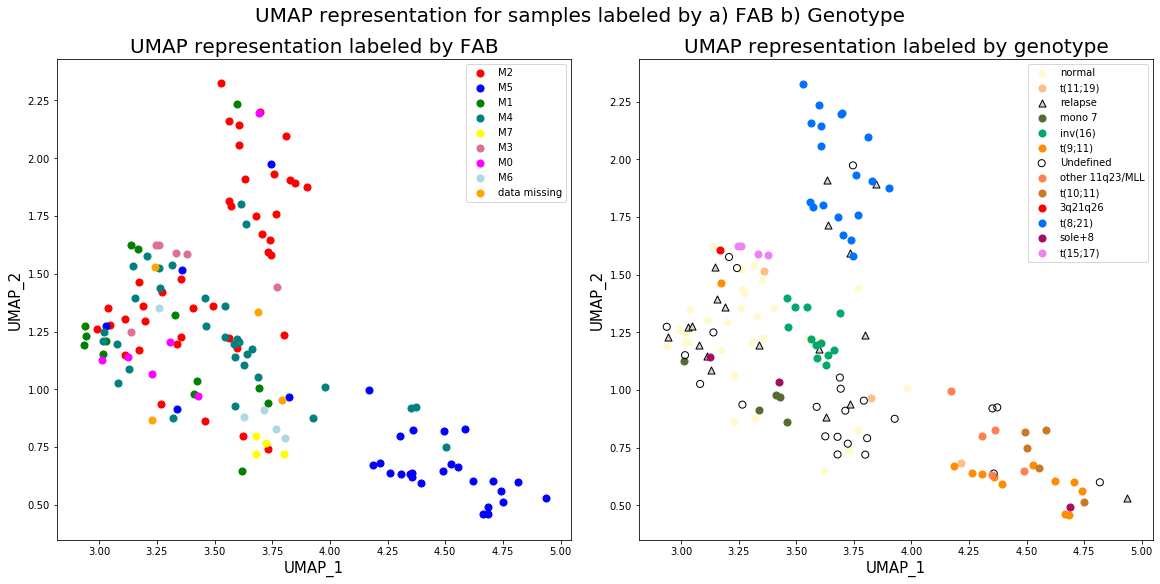

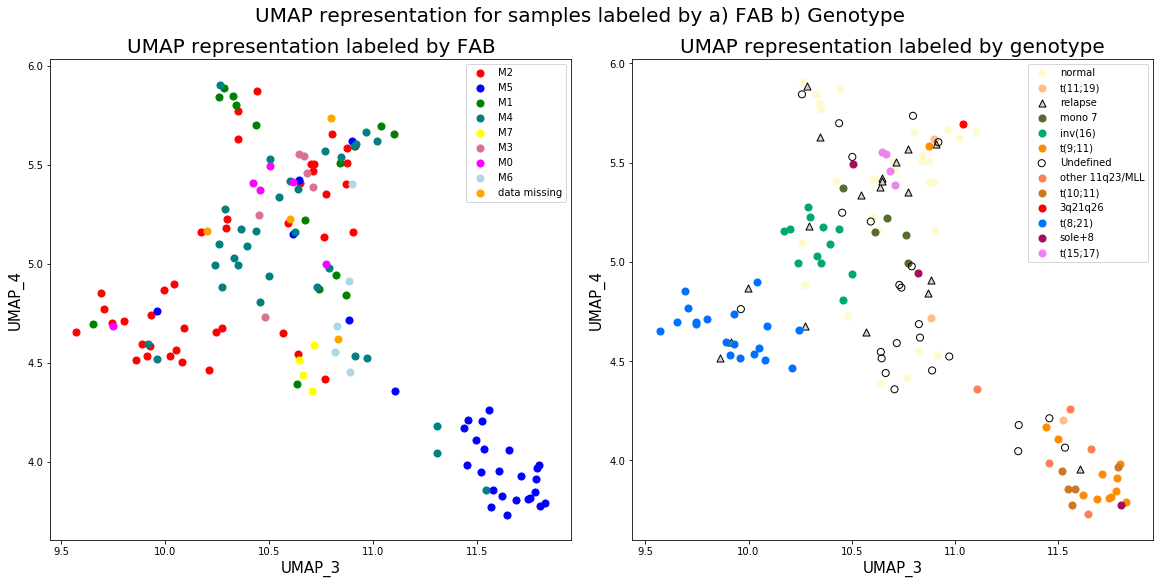

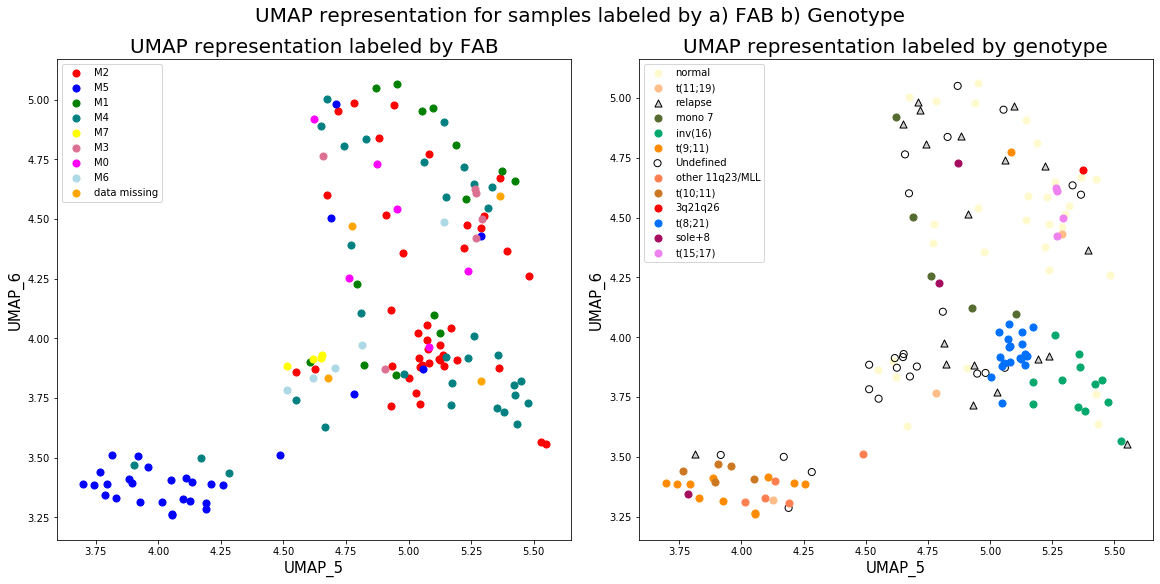

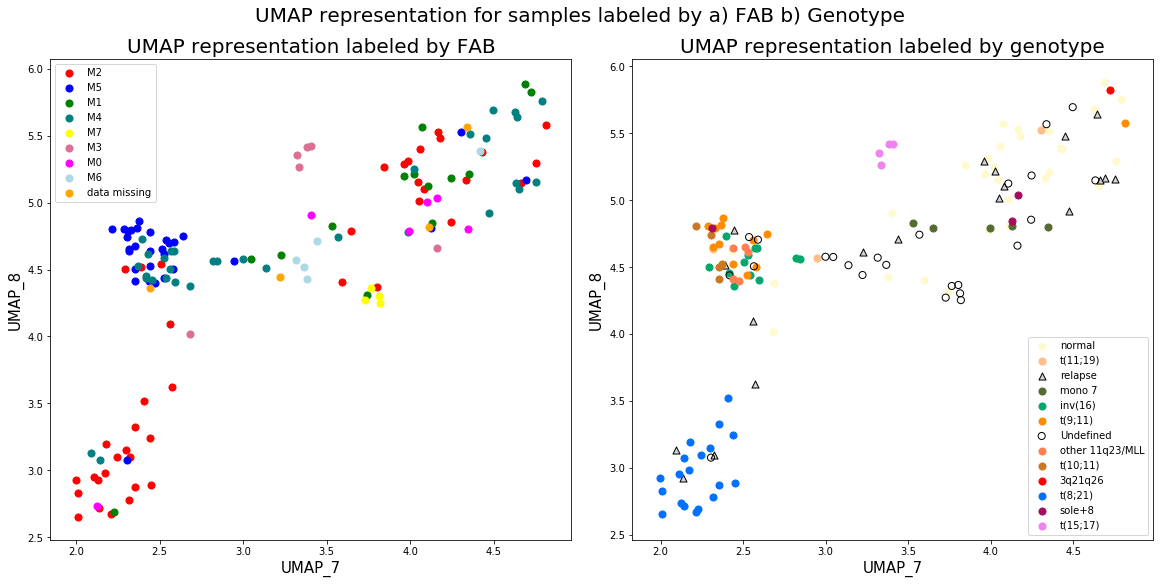

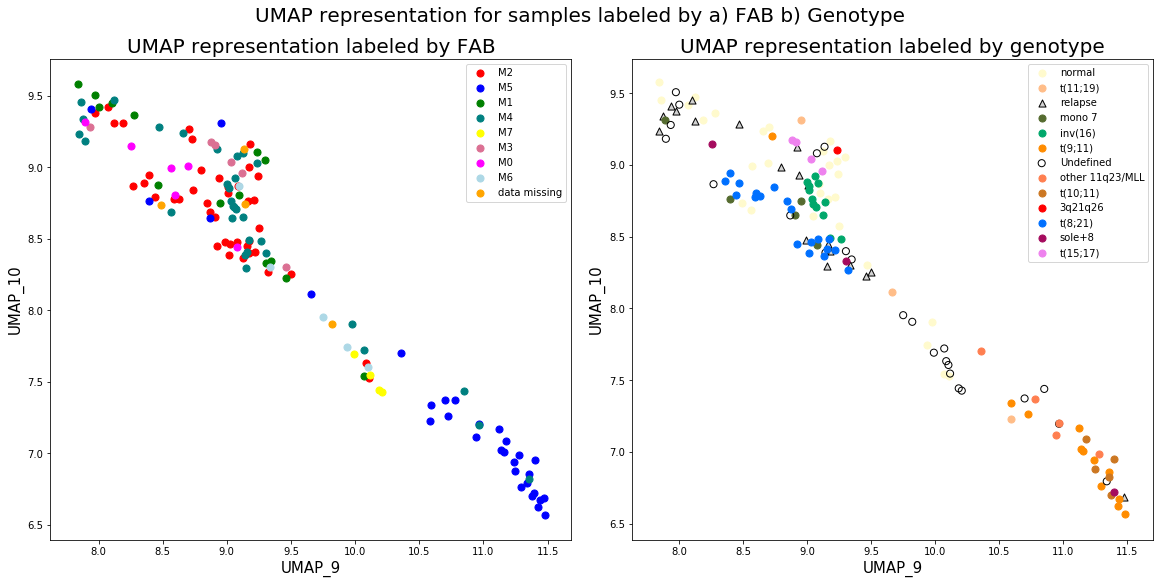

In [24]:
for comp in range(1, n_components + 1, 2): #step factor =2 so we compare 1-2, 3-4 etc.
    
    fig = plt.figure(constrained_layout=True, figsize = (16,8))
    widths = [18, 18]
    heights = [10]
    spec = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths,
                                  height_ratios=heights)


    kplot = fig.add_subplot(spec[0,0])
    kplot.set_xlabel('UMAP_{}'.format(comp), fontsize = 15)
    kplot.set_ylabel('UMAP_{}'.format(comp + 1 ), fontsize = 15)
    kplot.set_title('UMAP representation labeled by FAB', fontsize = 20)
    clusterings = list(finaldf.FAB.unique())
    colorings = ['r', 'b', 'g', 'teal', 'yellow', 'palevioletred', 'magenta', 'lightblue', 'orange']
    
    for clustering, coloring in zip(clusterings, colorings):
        indicesToKeep = finaldf['FAB'] == clustering
        kplot.scatter(finaldf.loc[indicesToKeep, 'UMAP_{}'.format(comp)]
                   , finaldf.loc[indicesToKeep, 'UMAP_{}'.format(comp + 1)]
                   , c = coloring           
                   , s = 50)
    kplot.legend(clusterings)
    


    kplot2 = fig.add_subplot(spec[0,1])
    kplot2.set_xlabel('UMAP_{}'.format(comp), fontsize = 15)
    kplot2.set_ylabel('UMAP_{}'.format(comp + 1 ), fontsize = 15)
    kplot2.set_title('UMAP representation labeled by genotype', fontsize = 20)
    
    clusterings = list(finaldf.finalgenotype3.unique())
    

    
    

    for clustering, coloring in zip(clusterings, gencolor):
        indicesToKeep = finaldf['finalgenotype3'] == clustering
        if clustering == 'Undefined':
            kplot2.scatter(finaldf.loc[indicesToKeep, 'UMAP_{}'.format(comp)]
                   , finaldf.loc[indicesToKeep, 'UMAP_{}'.format(comp + 1)]
                   , c = 'none'           
                   , s = 50
                   , edgecolor = 'black')
            
        elif clustering == 'relapse':
            kplot2.scatter(finaldf.loc[indicesToKeep, 'UMAP_{}'.format(comp)]
                   , finaldf.loc[indicesToKeep, 'UMAP_{}'.format(comp + 1)]
                   , c = coloring
                   , marker = '^'
                   , s = 50
                   , edgecolor = 'black')
        else:  
            kplot2.scatter(finaldf.loc[indicesToKeep, 'UMAP_{}'.format(comp)]
                       , finaldf.loc[indicesToKeep, 'UMAP_{}'.format(comp + 1)]
                       , c = coloring           
                       , s = 50)
  
    kplot2.legend(clusterings)
  
    kplot2.legend(list(finaldf.finalgenotype3.unique()))
    
    
    plt.suptitle('UMAP representation for samples labeled by a) FAB b) Genotype', fontsize = 20)
    #plt.subplots_adjust(hspace=0)
    plt.grid()
    kplot2.grid()
    plt.show()